In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 

import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("data/data_full.csv", index_col=0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40782 entries, 1607130720314 to 1607151059636
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BDEP        40782 non-null  float64
 1   TPO         40782 non-null  float64
 2   HL          40782 non-null  float64
 3   BHT         40782 non-null  float64
 4   RPM         40782 non-null  float64
 5   TOR         40782 non-null  float64
 6   DEPT        40782 non-null  float64
 7   WOB         40782 non-null  float64
 8   Annotation  40782 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 3.1 MB


In [27]:
(
    df
    .describe(percentiles=[0.1,0.25,0.5,0.75,0.8,0.9])
    .T.drop(columns=['count'])
)

,mean,std,min,10%,25%,50%,75%,80%,90%,max
BDEP,4127.955822,566.059424,3055.281000,3299.898900,3636.986000,4179.45400,4610.241000,4635.444000,4842.660000,5063.135000
TPO,6.994612,35.537944,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,204.469157
HL,322.340748,157.367732,80.455998,94.473998,97.432497,393.94499,445.253488,451.333588,473.182188,528.517986
BHT,20.995024,13.380614,1.694000,2.047000,7.594000,22.20500,33.137500,36.100800,39.097000,39.987000
RPM,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
TOR,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
DEPT,5795.817000,0.000000,5795.817000,5795.817000,5795.817000,5795.81700,5795.817000,5795.817000,5795.817000,5795.817000
WOB,109.437709,154.935364,-10.760000,-1.600000,1.770000,6.64000,292.915000,315.470000,357.800000,451.030000
Annotation,0.324285,0.468113,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000


In [28]:
df['RPM'].value_counts()

RPM
0.0    40782
Name: count, dtype: int64

In [29]:
df['TOR'].value_counts()


TOR
0.0    40782
Name: count, dtype: int64

In [30]:
df['DEPT'].value_counts()


DEPT
5795.817    40782
Name: count, dtype: int64

As these 3 features has the same values across the entire df, they can be removed before the analysis because they add no information.

In [31]:
df = df.drop(columns=['RPM', 'TOR', 'DEPT'])

## Pearson's Correlation between features, including target.

<Axes: >

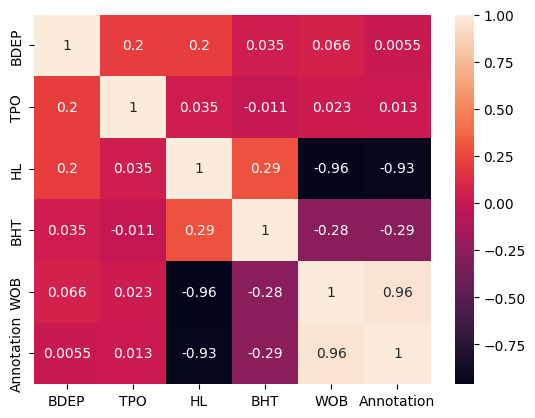

In [32]:
corr = df.corr()

sns.heatmap(corr, annot=True)

Based on the heat map analysis, it is evident that two features, namely WOB and HL, exhibit a strong correlation with the target variable, as well as with each other, with correlation coefficients approaching 1. On the other hand, the BDEP feature demonstrates a correlation value close to 0.
Given this information, it is advisable to temporarily exclude the columns TPO and BDEP from further consideration.

In [34]:
df = df.drop(columns=['TPO', 'BDEP'])


### Overall Analysis of each Feature

#### HL: hook load in klbf

<Axes: >

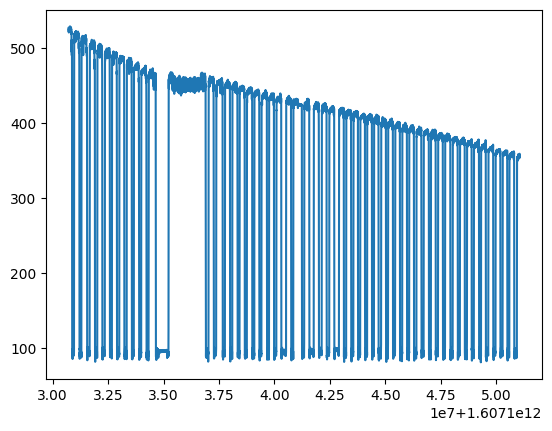

In [46]:
df.HL.plot()

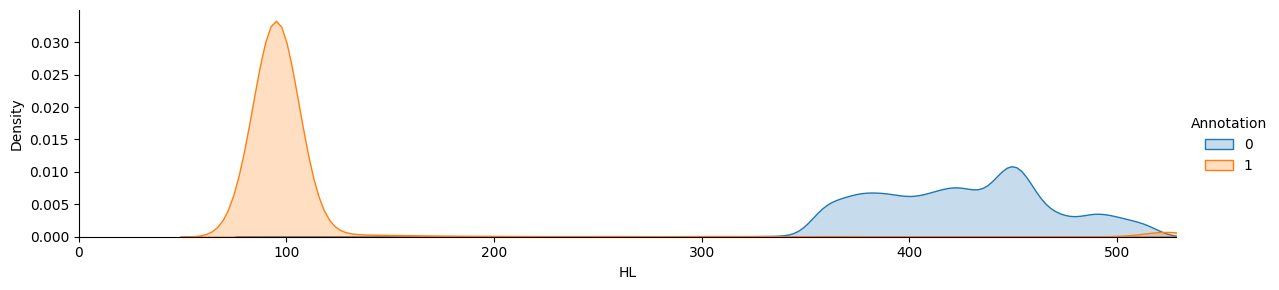

In [45]:
#historgram

a = sns.FacetGrid( df, hue = 'Annotation', aspect=4 )
a.map(sns.kdeplot, 'HL', shade= True )
a.set(xlim=(0 , df['HL'].max()))
a.add_legend()



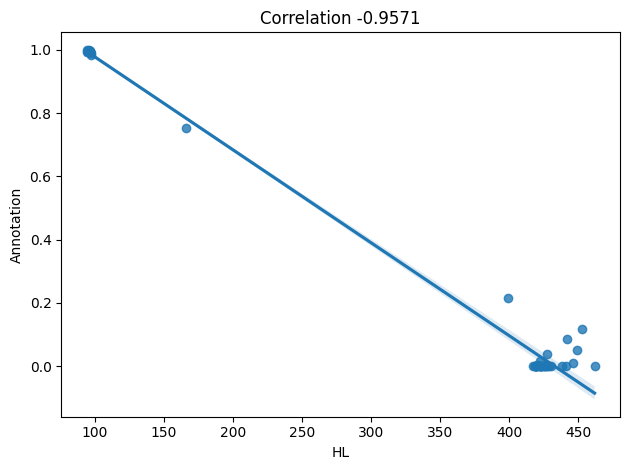

In [63]:
from sklearn.preprocessing import KBinsDiscretizer
var = 'HL'
target = 'Annotation'
datetime = df.index
hist_bins=50
preprocess = None
temp =pd.DataFrame({        
    'rank': KBinsDiscretizer(n_bins=hist_bins, encode='ordinal').fit_transform(df[['WOB']]).flatten(),
    'rank_cluster': KBinsDiscretizer(n_bins=5,strategy='kmeans', encode='ordinal').fit_transform(df[['WOB']]).flatten(),
    var: preprocess(df[var].values) if preprocess is not None else df[var],
    target:df[target]
})    
sns.regplot(x=var,y=target,ax=plt.gca(), data=temp.groupby('rank').mean());

plt.title("Correlation %0.4f" % temp.groupby('rank').mean().corr().values[0,1]);
plt.tight_layout();
plt.show();

####  WOB: weight on bit in klbf

<Axes: >

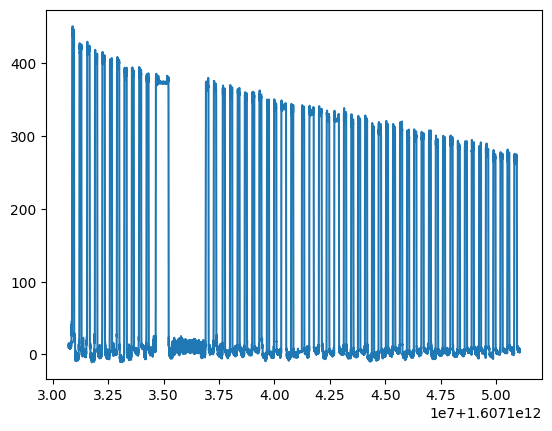

In [47]:
df.WOB.plot()

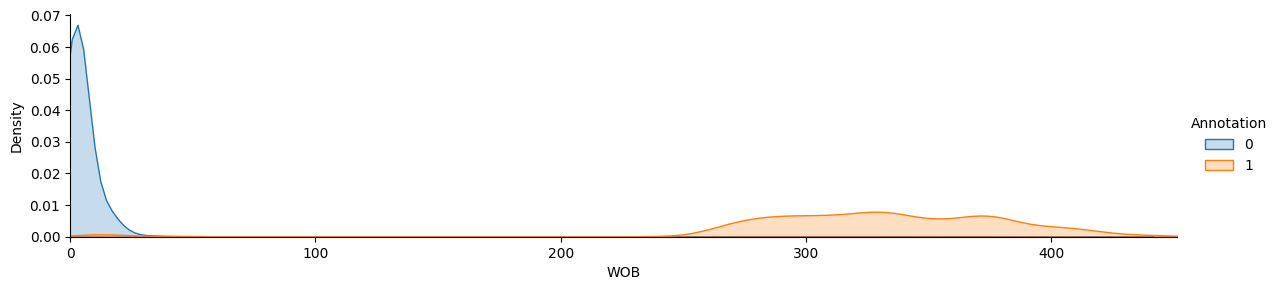

In [44]:
#historgram

a = sns.FacetGrid( df, hue = 'Annotation', aspect=4 )
a.map(sns.kdeplot, 'WOB', shade= True )
a.set(xlim=(0 , df['WOB'].max()))
a.add_legend()



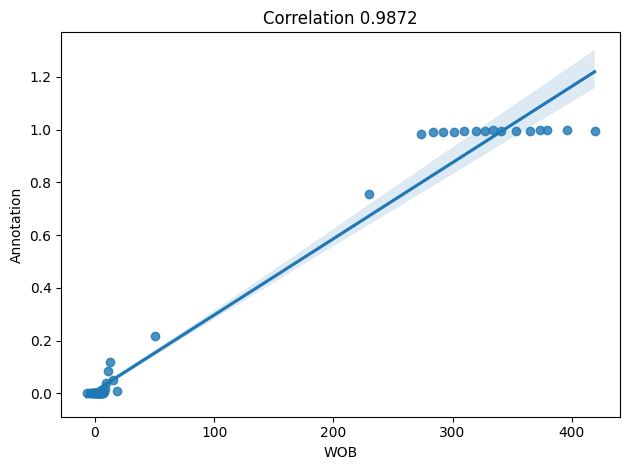

In [61]:
from sklearn.preprocessing import KBinsDiscretizer
var = 'WOB'
target = 'Annotation'
datetime = df.index
hist_bins=50
preprocess = None
temp =pd.DataFrame({        
    'rank': KBinsDiscretizer(n_bins=hist_bins, encode='ordinal').fit_transform(df[['WOB']]).flatten(),
    'rank_cluster': KBinsDiscretizer(n_bins=5,strategy='kmeans', encode='ordinal').fit_transform(df[['WOB']]).flatten(),
    var: preprocess(df[var].values) if preprocess is not None else df[var],
    target:df[target]
})    
sns.regplot(x=var,y=target,ax=plt.gca(), data=temp.groupby('rank').mean());

plt.title("Correlation %0.4f" % temp.groupby('rank').mean().corr().values[0,1]);
plt.tight_layout();
plt.show();

#### BHT: block position in m

<Axes: >

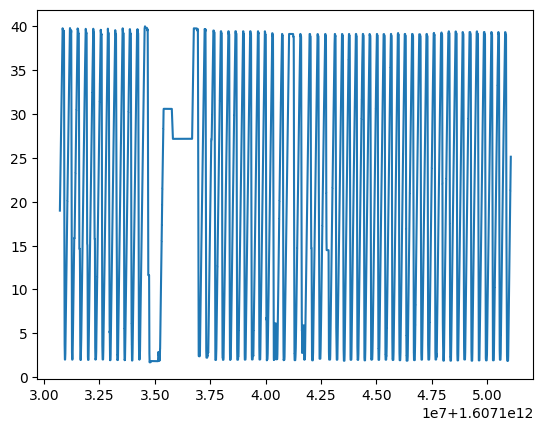

In [49]:
df.BHT.plot()

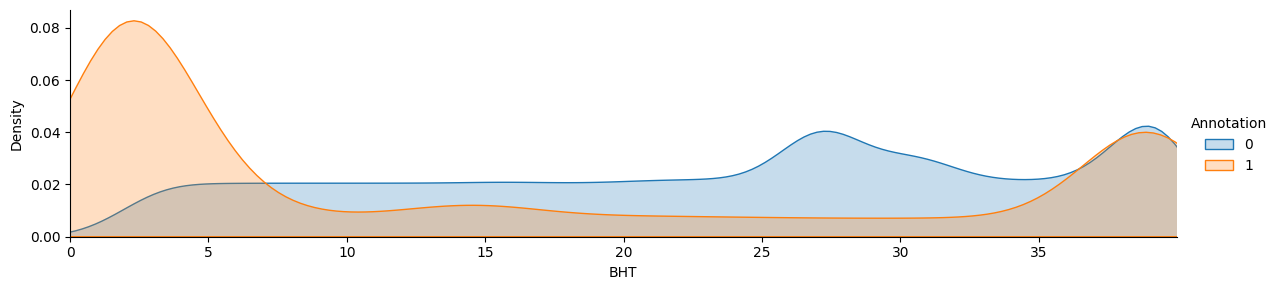

In [51]:
#historgram

a = sns.FacetGrid( df, hue = 'Annotation', aspect=4 )
a.map(sns.kdeplot, 'BHT', shade= True )
a.set(xlim=(0 , df['BHT'].max()))
a.add_legend()



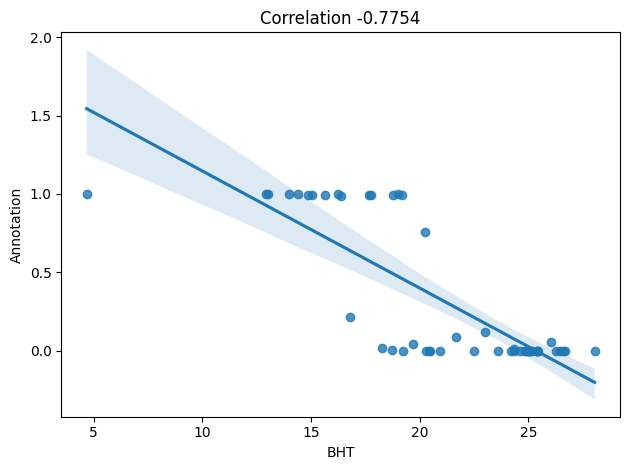

In [62]:
from sklearn.preprocessing import KBinsDiscretizer
var = 'BHT'
target = 'Annotation'
datetime = df.index
hist_bins=50
preprocess = None
temp =pd.DataFrame({        
    'rank': KBinsDiscretizer(n_bins=hist_bins, encode='ordinal').fit_transform(df[['WOB']]).flatten(),
    'rank_cluster': KBinsDiscretizer(n_bins=5,strategy='kmeans', encode='ordinal').fit_transform(df[['WOB']]).flatten(),
    var: preprocess(df[var].values) if preprocess is not None else df[var],
    target:df[target]
})    
sns.regplot(x=var,y=target,ax=plt.gca(), data=temp.groupby('rank').mean());

plt.title("Correlation %0.4f" % temp.groupby('rank').mean().corr().values[0,1]);
plt.tight_layout();
plt.show();